In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X = X / 255

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
classes = np.sort(np.array(y.unique()))
classes

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape

((63000, 784), (7000, 784))

In [7]:
clf = MultinomialNB()

In [8]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [9]:
print(classification_report(y_pred, y_test, target_names=classes))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       690
           1       0.94      0.89      0.92       862
           2       0.83      0.86      0.84       682
           3       0.79      0.78      0.78       690
           4       0.74      0.82      0.78       594
           5       0.63      0.87      0.73       441
           6       0.93      0.87      0.90       717
           7       0.82      0.94      0.88       662
           8       0.76      0.63      0.69       834
           9       0.82      0.69      0.75       828

    accuracy                           0.82      7000
   macro avg       0.82      0.83      0.82      7000
weighted avg       0.83      0.82      0.82      7000



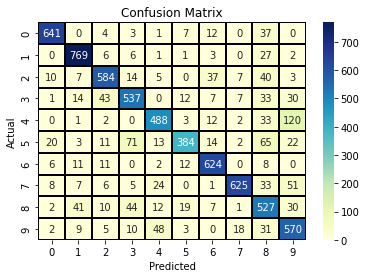

In [10]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.axes()
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='d', cmap='YlGnBu', ax=ax, xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor='black')
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()